## Ryan Shaw (B00634437)

## COM499 Artificial Intelligence - Assignment 2

### Part A: Classification using Machine Learning (80%)

**Importing dataset:**
- Below is code that imports some of the libraries required throughout all written code along with code that will import and display the dataset I am required to produce analysis on.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataset diagnose2.csv
dataset = pd.read_csv('diagnose2.csv')

# Display the imported dataset
display(dataset.head())
display(dataset.describe())

,ID,Gender,Location,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Diagnosis
0,0,Male,Dublin,591.305146,-445.646021,-1792.511304,-43.554215,144.532731,31.930570,-326.565365,-27.181295,1491.214602,-16.075643,-1008.975591,1443.114521,1122.309632,1
1,1,NaN,London,1646.650850,-1231.555731,-544.183955,85.151732,-298.180013,91.094109,234.224992,-16.255377,3429.620922,-567.726922,-1894.958494,544.079461,2771.062100,2
2,2,Female,Belfast,17.937351,-594.165140,-647.680440,22.903837,NaN,15.474708,768.760910,-0.578832,82.072136,131.825799,86.705431,131.132690,1750.231751,0
3,3,Male,Belfast,985.648670,-903.923263,-775.103070,18.531142,52.600030,0.925980,624.792227,12.011113,NaN,-183.137698,-1333.005543,-266.900451,182.950280,2
4,4,Male,London,983.829283,-1431.588452,409.232842,40.739642,-258.700803,27.328327,-1005.938914,8.477903,1060.556109,263.230291,-1982.092159,976.272234,-585.290151,2


,ID,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,Diagnosis
count,392.000000,392.000000,391.000000,392.000000,392.000000,391.000000,392.000000,391.000000,392.000000,391.000000,392.000000,391.000000,392.000000,391.000000,392.000000
mean,195.500000,150.639335,-119.207335,-226.931403,8.740624,-30.617114,5.632518,-33.034180,0.985648,318.612845,6.581419,-66.567258,35.023544,427.607151,0.994898
std,113.304898,541.127659,831.058722,1011.499990,25.258413,253.889756,68.597234,773.984443,14.218005,877.385685,459.003375,1041.685930,648.449640,1423.408399,0.818566
min,0.000000,-1752.000753,-2004.988049,-3131.223063,-65.759403,-684.129336,-186.545981,-2261.472982,-34.718490,-2191.538860,-1272.063334,-2911.285396,-2019.047863,-3413.203205,0.000000
25%,97.750000,-187.153553,-709.174573,-906.715474,-8.170030,-193.288066,-46.225259,-475.987936,-8.674107,-236.505814,-304.794067,-890.633278,-377.404464,-457.432102,0.000000
50%,195.500000,121.699687,-178.087579,-309.242004,10.341885,-21.119164,12.171812,-37.142842,0.759139,298.345970,36.185664,-88.789079,16.247891,431.770186,1.000000
75%,293.250000,472.012525,483.854894,290.715678,26.322306,138.593566,53.769455,502.007793,10.561777,924.109571,311.012854,636.939333,452.084230,1418.902292,2.000000
max,391.000000,1788.885281,2205.480804,2801.793625,85.151732,687.540199,167.810458,2605.817570,46.108043,3429.620922,1361.415470,2901.347712,1602.334073,4939.415762,2.000000


- As you can see in the above output, there are several columns in the dataset that are currently missing data. There columns Gender and Diagnosis are included in the dataset which in reality are binary values i.e. a person is either male or female and they either test positive or test negative. In this case the 2's that appear in the Diagnosis variable data will need to be set to either 1 or 0.
<br><br>
- In this dataset the target variable is Diagnosis, this is the variable that the machine learning algorithms are attempting to predict.
<br><br>
- There is also a mixture of both categorical data and numerical data. Categorical data are attributes treated as distinct symbols or just names, there is no direct realtionship between the values [1]. ID, Gender, Location, and Diagnosis are categorical data and therefore missing data will need to be handled differently to the other variables in the dataset. It is also true that in this case ID, Gender, and Location can be classed as being nominal data, that is that they are equally valued [2] and do not hold any significance in terms of affecting the target variable (Diagnosis). 
<br><br>
- I believe the best approach to analysing this dataset is to handle the missing data and recode categorical data before splitting the data into the training and test sets.
<br><br>
- I decided at this point to change the 2 values in the Diagnosis column to 0 which I am assuming is a negative diagnosis. This makes sense as we have to assume someone is negative until it is proven that they are positive.

In [2]:
# Replace 2's in Diagnosis data to 0
dataset = dataset.replace({"Diagnosis" : 2}, 0)

**Handling missing data for both numerical and categorical variables:**
- This section sets out how missing data both numerical and categorical is handled. For numerical data the "mean" strategy should suffice. For categorical data the "most frequent" strategy is the best approach in this case. For both approaches the SimpleImputer class  from Scikit learn will be used.
<br><br>
- The below code specifies the features in the variable X and sets the target in variable Y. In this case features are each row of data in the dataset apart from the Diagnosis variable as this is the target variable.

In [3]:
# Set features in X
X = dataset.iloc[:, :-1].values

# Set target (Diagnosis) in Y
Y = dataset.iloc[:, 16].values

# Test that X has been set 
print(f"X: ")
print(X[0])

# Test that Y has been set
print("\nY: ")
print(Y)

X: 
[0 'Male' 'Dublin' 591.3051465 -445.6460209 -1792.511304 -43.55421543
 144.5327311 31.93057028 -326.5653653 -27.18129505 1491.214602
 -16.07564261 -1008.975591 1443.114521 1122.309632]

Y: 
[1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1
 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0]


- As you can see in the output above X has been set to include all data up to the Diagnosis variable in each row. You can also see that Y now includes all data stored in the Diagnosis variable.
<br><br>
- The below code gets all variables from column 4 through to 15 in each row of the dataset and handles the missing data in this variables using the "mean" strategy. These columns hold numerical data. This approach is known as simple imputation and is widely used due to its simplicity and can be considered an easy refernce technique [3].

In [4]:
# Import SimpleImputer library from Scikit learn
from sklearn.impute import SimpleImputer

# Print test row before imputation
print("Pre Imputation X: ")
print(X[2])

# Declare new SimpleImputer object with the "mean" strategy, missing_values in dataset are "nan" 
imputerNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')

# Use the imputer object to set the missing values in columns 4 to 15 these columns are the numeric data
X[:,3:16] = imputerNumeric.fit_transform(X[:,3:16])

# Test that the imputation has worked, print out row 3 in the dataset as we know from earlier that this contains a nan value
print("\nPost Imputation X: ")
print(X[2])

Pre Imputation X: 
[2 'Female' 'Belfast' 17.937351 -594.1651401 -647.6804397 22.9038367 nan
 15.47470763 768.7609101 -0.578832268 82.07213639 131.825799 86.70543148
 131.13269 1750.231751]

Post Imputation X: 
[2 'Female' 'Belfast' 17.937351 -594.1651401 -647.6804397 22.9038367
 -30.617113789094628 15.47470763 768.7609101 -0.578832268 82.07213639
 131.825799 86.70543148 131.13269 1750.231751]


- As you can see from the above output the imputation has successfully handled the missing data. The "nan" data in row 3 of the dataset has been set to the mean value "-30.61711378909462".
<br><br>
- The below code gets variables from column 2 and 3 in each row of the dataset and handles the missing data in this variables using the "most frequent" strategy. These columns hold categorical data. This is a common approach for handling missing categorical data and works well with small datasets like the one being analysed here [4].

In [5]:
# Print test row before imputation
print("Pre Imputation X: ")
print(X[1])

# Declare new SimpleImputer object with the "most frequent" strategy,  missing_values in dataset are "nan"
imputerCategorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Use the imputer object to set the missing values in columns 2 and 3 these columns are the categorical data
X[:,1:3] = imputerCategorical.fit_transform(X[:,1:3])

# Test that the imputation has worked, print out row 2 in the dataset as we know from earlier that this contains a nan value
print("\nPost Imputation X: ")
print(X[1])

Pre Imputation X: 
[1 nan 'London' 1646.65085 -1231.555731 -544.1839545 85.15173229
 -298.1800129 91.09410919 234.2249924 -16.25537703 3429.620922
 -567.7269218 -1894.958494 544.0794606 2771.0621]

Post Imputation X: 
[1 'Male' 'London' 1646.65085 -1231.555731 -544.1839545 85.15173229
 -298.1800129 91.09410919 234.2249924 -16.25537703 3429.620922
 -567.7269218 -1894.958494 544.0794606 2771.0621]


- As you can see from the above output the imputation has successfully handled the missing data. The "nan" data in row 3 of the dataset has been set to the most frequent value "Male".
<br><br>
- Although the imputation techniques I have deployed here work for this type and size of dataset it must be noted that when it comes to large datasets and "big data" they may perform poorly with the potential for bias or unrealistic results [5].

**Recoding of categorical variables to enable their use in the classification algorithms:**
- This section sets out how I recoded the categorical variables in this dataset. The categorical variables in this case contain textual data which can cause issues within algorithms when calcualtions are attempted. The use of dummy variables is one way to resolve this problem. A dummy variable is a binary variable coded as 1 or 0 to represent the presence or absence of a variable [6].
<br><br>
- To created dummy variables I have used the one hot encoding technique which is the most widely used coding scheme. One hot encoding transforms a single variable with n observations and d distinct values, to d binary variables with n observations each [7]. Dummy variables are created alphabetically based on the data stored in the variable that is being recoded.
<br><br>
- The below code uses the Scikit learn OneHotEncoder library to recode the Location variable and create the dummy variables associated with the Location data in the dataset.

In [6]:
# Import OneHotEncoder library from Scikit learn
from sklearn.preprocessing import OneHotEncoder

# Print test row before recoding
print("Pre Location recoding X: ")
print(X[0])

# Declare new OneHotEncoder object, handle_unknown="ignore" means in the case of unkown categories will be given 0 
encoderLocation = OneHotEncoder(handle_unknown='ignore')

# Store ID and Gender data so it can be added to the dataset again at the start
idGenderData = X[:,0:2].reshape(-1, 2)

# Store Location data to be recoded
locationData = X[:,2].reshape(-1, 1)

# Store recoded Location data in array
locationDataArray = encoderLocation.fit_transform(locationData).toarray()

# Add recoded Location data back into dataset
X = np.concatenate((locationDataArray, X[:, 3:16]),axis=1)

# Add ID and Gender data back into dataset
X = np.concatenate((idGenderData, X[:, 0:16]),axis=1)

# Test that Location recoding has worked, print out row 0 in the dataset
print("\nPost Location recoding X: ")
print(X[0])

Pre Location recoding X: 
[0 'Male' 'Dublin' 591.3051465 -445.6460209 -1792.511304 -43.55421543
 144.5327311 31.93057028 -326.5653653 -27.18129505 1491.214602
 -16.07564261 -1008.975591 1443.114521 1122.309632]

Post Location recoding X: 
[0 'Male' 0.0 1.0 0.0 591.3051465 -445.6460209 -1792.511304 -43.55421543
 144.5327311 31.93057028 -326.5653653 -27.18129505 1491.214602
 -16.07564261 -1008.975591 1443.114521 1122.309632]


- As you can see from the above output the Location data has been recoded and split into 3 dummy variables, one for each of the 3 different locations that are stored in the dataset. As previously stated dummy variables are created alphabetically based on the data stored in the variable that is being recoded. Therefore in this case the dummy variables will look like the following for each of the different locations: Belfast = 1.0 0.0 0.0, Dublin = 0.0 1.0 0.0, London = 0.0 0.0 1.0
<br><br>
- The below code uses the Scikit learn OneHotEncoder library to recode the Gender variable and create the dummy variables associated with the Gender data in the dataset.

In [7]:
# Print test row before recoding
print("Pre Gender recoding X: ")
print(X[0])

# Declare new OneHotEncoder object, handle_unknown="ignore" means in the case of unkown categories will be given 0 
encoderGender = OneHotEncoder(handle_unknown='ignore')

# Store ID data so it can be added to the dataset again at the start
idData = X[:,0].reshape(-1, 1)

# Store Gender data to be recoded
genderData = X[:,1].reshape(-1, 1)

# Store recoded Gender data in array
genderDataArray = encoderGender.fit_transform(genderData).toarray()

# Add recoded Gender data back into dataset
X = np.concatenate((genderDataArray, X[:, 2:16]),axis=1)

# Add ID data back into dataset
X = np.concatenate((idData, X[:, 0:16]),axis=1)

# Test that Location recoding has worked, print out row 0 in the dataset
print("\nPost Gender recoding X: ")
print(X[0])

Pre Gender recoding X: 
[0 'Male' 0.0 1.0 0.0 591.3051465 -445.6460209 -1792.511304 -43.55421543
 144.5327311 31.93057028 -326.5653653 -27.18129505 1491.214602
 -16.07564261 -1008.975591 1443.114521 1122.309632]

Post Gender recoding X: 
[0 0.0 1.0 0.0 1.0 0.0 591.3051465 -445.6460209 -1792.511304 -43.55421543
 144.5327311 31.93057028 -326.5653653 -27.18129505 1491.214602
 -16.07564261 -1008.975591]


- As you can see from the above output the Gender data has been recoded and split into 2 dummy variables, one for both genders that are stored in the dataset. As previously stated dummy variables are created alphabetically based on the data stored in the variable that is being recoded. Therefore in this case the dummy variables will look like the following for each of the different genders: Female = 1.0 0.0, Male = 0.0 1.0
<br><br> 
- Another option to recode would have been the label encoding technique. This technique would have assigned a numeric value to each of the different data stored in the categorical variables. However, I believe the one hot encoding technique is better as label encoding can make it seem as though there is a ranking in values [8], meaning it could be interrupted as one value being worth more than another which is not the case in the dataset I am analysing.

**Creating a training set for building a classifier using cross-validation, and a separate test set:**
- This section sets out how I created the test an and train sets that will be used later for building the algorithm classifiers.
<br><br>
- The below code uses the Scikit learn train_test_split library to perform the train and test split on the dataset.

In [8]:
# Import train_test_split library from Scikit learn
from sklearn.model_selection import train_test_split

# Create training and test sets, use 0.2 as test_size this is the ideal size for the size of the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Test that the test and train sets have been created
print("X_train: ")
print(X_train)
print("\nX_test: ")
print(X_test)
print("\nY_train: ")
print(Y_train)
print("\nY_test: ")
print(Y_test)

X_train: 
[[218 1.0 0.0 ... 347.5217703 278.8546768 1592.212563]
 [254 0.0 1.0 ... -1338.25921 -457.5211352 1803.452377]
 [299 1.0 0.0 ... 841.7755683 194.0225537 -654.6161471]
 ...
 [117 0.0 1.0 ... -1189.741809 -75.98622531 208.5133433]
 [47 0.0 1.0 ... 398.6484396 852.8361183 -872.159654]
 [172 0.0 1.0 ... 605.2956319 -425.0570693 403.3160008]]

X_test: 
[[144 1.0 0.0 ... -901.7869606 365.4597739 2901.347712]
 [280 0.0 1.0 ... 665.2351025 -686.5941913 -1282.913374]
 [68 1.0 0.0 ... -164.6352031 120.7850691 1898.784329]
 ...
 [55 0.0 1.0 ... -28.9399856 -733.9748226 -307.8119067]
 [260 0.0 1.0 ... 66.17541082 -688.5560418 -8.68828564]
 [214 1.0 0.0 ... 334.1383468 -853.499496 -290.3024001]]

Y_train: 
[1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0

- As you can see from the above output the train and test sets have been successfully created to be used later when building the algoreithm classifiers. Again I decided to use an 80/20 split, 80% training, 20%, test as although there is no consensus on what is the best approach, this seems to be the most widely used split.

**Feature scaling based on the training set and applied to both the training set and the test set:**
- Feature scaling is a key statisitical technique that scales the data so that each variables data is within a similar range. The 2 main feature scaling techniques are Normalisation and Standardisation. For this dataset I have implemented the Standardisation technique as Normaisation can be sensitive to outliers which this dataset has [9].
<br><br>
- The below code use the Scikit learn StandardScaler library to perform feature scaling on both the test and train sets.

In [9]:
# Import StandardScaler library from Scikit learn
from sklearn.preprocessing import StandardScaler

# Print test mean before feature scaling
print("Pre Feature Scaling mean:")
print("Mean of X_train: {:5.3f}".format(np.mean(X_train)))
print("Mean of X_test: {:5.3f}".format(np.mean(X_test)))

# Print test standard deviation before feature scaling
print("\nPre Feature Scaling standard deviation:")
print("Standard Deviation of X_train: {:5.3f}".format(np.std(X_train)))
print("Standard Deviation of X_test: {:5.3f}".format(np.std(X_test)))

# Decalre new StandardScaler object
scaler = StandardScaler()

# Scale train set
X_train = scaler.fit_transform(X_train)

# Scale test set
X_test = scaler.fit_transform(X_test)

# Test that standardisation has worked, check that mean = 0
print("\nPost Feature Scaling mean:")
print("Mean of X_train: {:5.3f}".format(np.mean(X_train)))
print("Mean of X_test: {:5.3f}".format(np.mean(X_test)))

# Test that standardisation has worked, check that standard deviation = 1
print("\nPost Feature Scaling standard deviation:")
print("Standard Deviation of X_train: {:5.3f}".format(np.std(X_train)))
print("Standard Deviation of X_test: {:5.3f}".format(np.std(X_test)))

Pre Feature Scaling mean:
Mean of X_train: 7.333
Mean of X_test: 32.924

Pre Feature Scaling standard deviation:
Standard Deviation of X_train: 542.291
Standard Deviation of X_test: 532.719

Post Feature Scaling mean:
Mean of X_train: 0.000
Mean of X_test: 0.000

Post Feature Scaling standard deviation:
Standard Deviation of X_train: 1.000
Standard Deviation of X_test: 1.000


- As you can see from the above output feature scaling using the Standardisation technique has been successful. The mean of both the test and train sets is now 0 and the standard deviation is 1 as expected. This should go some way to ensuring that there is no bias or invalid results when the algorithms are run.

**Using 10-fold cross-validation applied to the training set to build a classifier for each of your two 
Machine Learning methods (using the default parameters in each case):**
- This section sets out how I carried out cross validation. K-fold cross validation is a validation method for multiclass classification. Results are validated by randomly distributing the dataset in different groups [10]. In this case K-fold cross validation is applied to the training sets that were created earlier.
<br><br>
- The below code performs K-fold cross validation using a Support Vector Machine classifier.

In [10]:
# Import KFold,cross_validate libraries from Scikit learn
from sklearn.model_selection import KFold, cross_validate

# Import SVC library from Scikit learn
from sklearn.svm import SVC

# Declare new SVC object
supportVectorMachineClassifier = SVC(kernel = 'rbf', random_state = 0, probability=True)

# Declare new KFold obecjt with n_splits= 10 (This is the number of splits to be done on the train sets)
crossValidateSVM = KFold(n_splits=10, shuffle=True, random_state = 0)

# Perfrom cross validation on train sets and store result scores (accuracy and precision)
supportVectorMachineScores = cross_validate(estimator=supportVectorMachineClassifier, scoring={"accuracy",'precision'}, 
                                            X = X_train, y = Y_train, cv = crossValidateSVM)

# Check if cross validation has been successfully performed on train sets
if supportVectorMachineScores is not None:
    print("Support Vector Machine cross validation complete...")
else:
    print("Problem with Support Vector Machine cross validation...")

Support Vector Machine cross validation complete...


- As you can see from the above output K-fold cross validation on the training sets using the Suppoprt Vector Machine classifier has been successfuly carried out.
<br><br>
- The below code provides a summary of the result scores for Support Vector Machine cross validation.

In [11]:
# Print Support Vector Machine accuracy for each fold
print('Support Vector Machine accuracy for each fold:')
print(supportVectorMachineScores['test_accuracy'])

# Print Support Vector Machine mean accuracy and standard deviation in accuracy
print('\nSupport Vector Machine mean accuracy: {:5.3f}'.format(supportVectorMachineScores['test_accuracy'].mean()))
print('Support Vector Machine standard deviation in accuracy: {:5.3f}\n'
      .format(supportVectorMachineScores['test_accuracy'].std()))

# Print Support Vector Machine mean precision and standard deviation in precision
print('Support Vector Machine mean precision: {:5.3f}'.format(supportVectorMachineScores['test_precision'].mean()))
print('Support Vector Machine standard deviation in precision: {:5.3f}'.
      format(supportVectorMachineScores['test_precision'].std()))

Support Vector Machine accuracy for each fold:
[0.78125    0.71875    0.75       0.74193548 0.93548387 0.77419355
 0.77419355 0.80645161 0.64516129 0.64516129]

Support Vector Machine mean accuracy: 0.757
Support Vector Machine standard deviation in accuracy: 0.079

Support Vector Machine mean precision: 0.676
Support Vector Machine standard deviation in precision: 0.194


- The below code performs K-fold cross validation using a Decision Tree classifier.

In [12]:
# Import DecisionTreeClassifier library from Scikit learn
from sklearn.tree import DecisionTreeClassifier

# Declare new DecisionTreeClassifier object
decisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, ccp_alpha= 0.0)

# Declare new KFold obecjt with n_splits= 10 (This is the number of splits to be done on the train sets)
crossValidateDecisionTree = KFold(n_splits=10, shuffle=True, random_state = 0)

# Perfrom cross validation on train sets and store result scores (accuracy and precision)
decisionTreeScores = cross_validate(estimator=decisionTreeClassifier, scoring={"accuracy",'precision'}, 
                                            X = X_train, y = Y_train, cv = crossValidateDecisionTree)

# Check if cross validation has been successfully performed on train sets
if decisionTreeScores is not None:
    print("Decision Tree cross validation complete...")
else:
    print("Problem with Decision Tree cross validation...")

Decision Tree cross validation complete...


- As you can see from the above output K-fold cross validation on the training sets using the Decision Tree classifier has been successfuly carried out.
<br><br>
- The below code provides a summary of the result scores for Decision Tree cross validation.

In [13]:
# Print Decision Tree accuracy for each fold
print('Decision Tree accuracy for each fold:')
print(decisionTreeScores['test_accuracy'])

# Print Decision Tree mean accuracy and standard deviation in accuracy
print('\nDecision Tree mean accuracy: {:5.3f}'.format(decisionTreeScores['test_accuracy'].mean()))
print('Decision Tree standard deviation in accuracy: {:5.3f}\n'.format(decisionTreeScores['test_accuracy'].std()))

# Print Decision Tree mean precision and standard deviation in precision
print('Decision Tree mean precision: {:5.3f}'.format(decisionTreeScores['test_precision'].mean()))
print('Decision Tree standard deviation in precision: {:5.3f}'.format(decisionTreeScores['test_precision'].std()))

Decision Tree accuracy for each fold:
[0.84375    0.8125     0.78125    0.80645161 0.83870968 0.70967742
 0.74193548 0.87096774 0.70967742 0.67741935]

Decision Tree mean accuracy: 0.779
Decision Tree standard deviation in accuracy: 0.063

Decision Tree mean precision: 0.659
Decision Tree standard deviation in precision: 0.140


- The below code demonstrates the comparison between the cross validation score results for both algorithms.

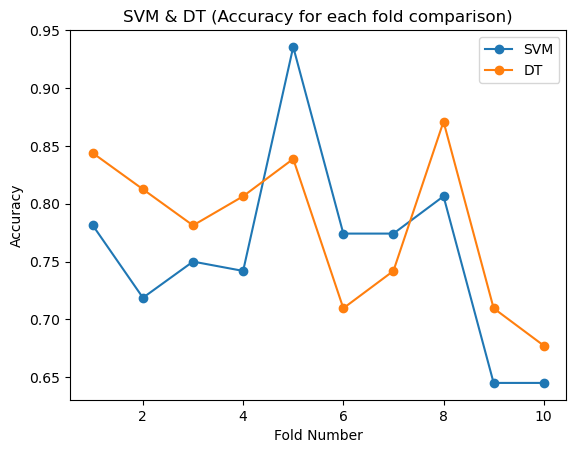

In [14]:
# Get Y axis points for each cross validation fold accuracy results scores
yPointsSVM = np.array(supportVectorMachineScores['test_accuracy'])
yPointsDT = np.array(decisionTreeScores['test_accuracy'])

# Set Y axis labels
yAxisLabels = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Plot points on graph
plt.plot(yAxisLabels, yPointsSVM, marker = 'o',)
plt.plot(yAxisLabels, yPointsDT, marker = 'o',)

# Add X and Y labels and Title
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.title("SVM & DT (Accuracy for each fold comparison)")

# Add legend
plt.legend(["SVM", "DT"])

# Show graph
plt.show()

- Using K-fold cross validation here should help limit problems that the algorithms may encounter such as over fitting and under fitting. It should also help get an intuition on how the model will generalise to an independent dataset [11]. I decided to use 10-fold cross-validation here as the dataset is limited in size though in theory the number of folds could be anything depending on the size of the dataset being analysed.

**Comparison of the performance of the two Machine Learning algorithms, using appropriate 
evaluation metrics (using the default parameters in each case)**
- This section sets out how the Support Vectore Machine and Decision Tree algorithms performed. To compare and evaluate the performance I have used the Confusion Matrix, Accuracy, Precision, Recall, F1-score, and ROC/AUC score.
<br><br>
- I decided to use the confusion matrix as it is a useful tool for determining the accuracy of the model by observing the diagonal values for measuring the number of accurate classifications [12]. 
<br><br>
- The below code is used for implmenting the Suppport Vector Machine and Decision Tree algorithms to make predictions and display the confusion matrix results for each.

Support Vector Machine Confusion Matrix:
[[48  4]
 [18  9]]


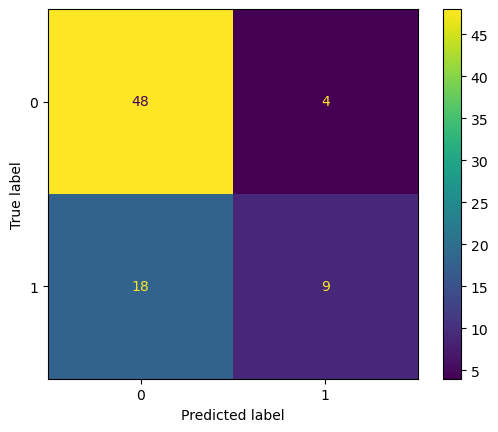

In [15]:
# Import libraries required to carry out evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict using Support Vector Machine Classifier
supportVectorMachineClassifier.fit(X_train, Y_train)
Y_predSVM = supportVectorMachineClassifier.predict(X_test)

# Construct the Support Vector Machine Confusion Matrix
cmSupportVectorMachine = confusion_matrix(Y_test, Y_predSVM, labels=supportVectorMachineClassifier.classes_)

# Print Support Vector Machine Confusion Matrix
print("Support Vector Machine Confusion Matrix:")
print(cmSupportVectorMachine)

# Display Support Vector Machine Confusion Matrix
displayCMSupportVectorMachine = ConfusionMatrixDisplay(confusion_matrix=cmSupportVectorMachine, 
                                                     display_labels=supportVectorMachineClassifier.classes_)
displayCMSupportVectorMachine.plot()
plt.show()

Decision Tree Confusion Matrix:
[[45  7]
 [17 10]]


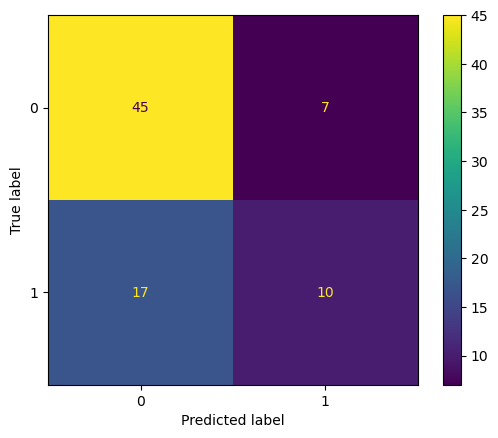

In [16]:
# Predict using Decision Tree Classifier
decisionTreeClassifier.fit(X_train, Y_train)
Y_predDT = decisionTreeClassifier.predict(X_test)

# Construct the Decision Tree Confusion Matrix
cmDecisionTree = confusion_matrix(Y_test, Y_predDT, labels=decisionTreeClassifier.classes_)

# Print Decision Tree Confusion Matrix
print("Decision Tree Confusion Matrix:")
print(cmDecisionTree)

# Display Decision Tree Confusion Matrix
displayCMDecisionTree = ConfusionMatrixDisplay(confusion_matrix=cmDecisionTree, 
                                                     display_labels=decisionTreeClassifier.classes_)
displayCMDecisionTree.plot()
plt.show()

- As you can see from the above outputs the Support Vector Machine classifier proved to perform better in terms of predicting the negatives, both True and False. Whereas the Decision Tree classifier proved to perform better at predicting positives. It must be noted however, that overall the difference in performance is negligible.
<br><br>
- The below code uses the "classification_report" library from Scikit learn to provide a report detailing Accuracy, Precision, Recall, and F1-score scores for each of the algorithms.

In [17]:
# Print Support Vector Machine Classification Report
print("Support Vector Machine Classification Report:")
print(classification_report(Y_test, Y_predSVM))

# Print Decision Tree Classification Report
print("\nDecision Tree Classification Report:")      
print(classification_report(Y_test, Y_predDT))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        52
           1       0.69      0.33      0.45        27

    accuracy                           0.72        79
   macro avg       0.71      0.63      0.63        79
weighted avg       0.72      0.72      0.69        79


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        52
           1       0.59      0.37      0.45        27

    accuracy                           0.70        79
   macro avg       0.66      0.62      0.62        79
weighted avg       0.68      0.70      0.68        79



- As you can see from the above output again the scores are close with the Support Vector Machine classifier performing slightly better overall, though again the difference is negligible.
<br><br>
- The below code gets the test and train probability for each algorithm and uses the "roc_auc_score" library from from Scikit learn and the probability to get the ROC/AUC score.

Support Vector Machine AUC score test:
0.7777777777777778

Support Vector Machine AUC score train:
0.9791955617198336

Decision Tree AUC score test:
0.6178774928774928

Decision Tree AUC score train:
1.0


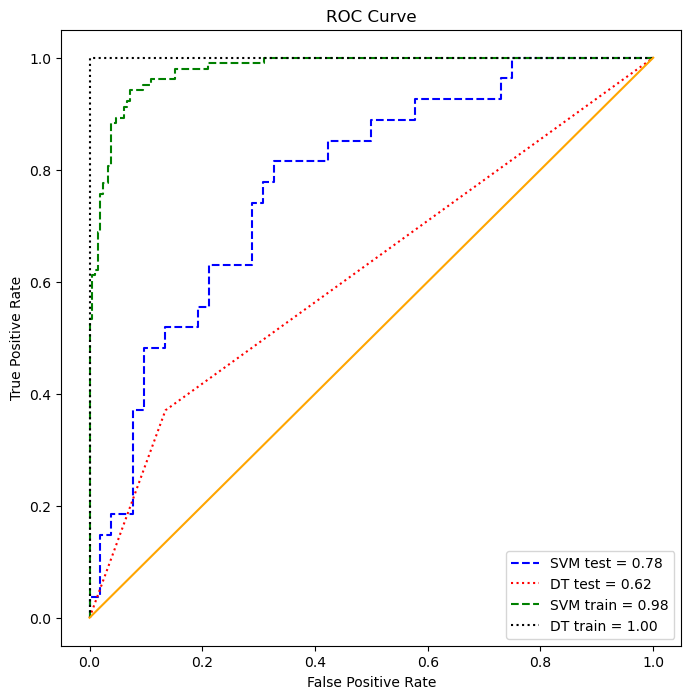

In [18]:
# Import metrics library from Scikit learn
from sklearn import metrics

# Import roc_auc_score library from Scikit learn
from sklearn.metrics import roc_auc_score

# Import RocCurveDisplay library from Scikit learn
from sklearn.metrics import RocCurveDisplay

# Get train set probability
probSVMTrain = np.squeeze(supportVectorMachineClassifier.predict_proba(X_train)[:,1].reshape(1,-1))
probDTTrain = np.squeeze(decisionTreeClassifier.predict_proba(X_train)[:,1].reshape(1,-1))

# Get test set probability
probSVMTest = np.squeeze(supportVectorMachineClassifier.predict_proba(X_test)[:,1].reshape(1,-1))
probDTTest = np.squeeze(decisionTreeClassifier.predict_proba(X_test)[:,1].reshape(1,-1))

# Get Support Vector Machine false positive rates
falsePosSVMTest, truePosSVMTest, thresholdSVMTest = metrics.roc_curve(Y_test, probSVMTest, pos_label=1)
falsePosSVMTrain, truePosSVMTrain, thresholdSVMTrain = metrics.roc_curve(Y_train, probSVMTrain, pos_label=1)

# Get Decision Tree Machine false positive rates
falsePosDTTest, truePosDTTest, thresholdDTTest = metrics.roc_curve(Y_test, probDTTest, pos_label=1)
falsePosDTTrain, truePosDTTrain, thresholdDTTrain = metrics.roc_curve(Y_train, probDTTrain, pos_label=1)

# Get Support Vector Machine AUC
aucScoreSVMTest = metrics.auc(falsePosSVMTest, truePosSVMTest)
aucScoreSVMTrain = metrics.auc(falsePosSVMTrain, truePosSVMTrain)

# Get Decision Tree AUC
aucScoreDTTest = metrics.auc(falsePosDTTest, truePosDTTest)
aucScoreDTTrain = metrics.auc(falsePosDTTrain, truePosDTTrain)

# Print Support Vector Machine AUC
print("Support Vector Machine AUC score test:")
print(aucScoreSVMTest)
print("\nSupport Vector Machine AUC score train:")
print(aucScoreSVMTrain)

# Print Decision Tree AUC
print("\nDecision Tree AUC score test:")
print(aucScoreDTTest)
print("\nDecision Tree AUC score train:")
print(aucScoreDTTrain)

# Plot and show ROC Curve
plt.figure(figsize=(8,8))
plt.plot(falsePosSVMTest, truePosSVMTest, linestyle='dashed', color='blue', label='SVM test = %0.2f'%aucScoreSVMTest)
plt.plot(falsePosDTTest, truePosDTTest, linestyle='dotted', color='red', label='DT test = %0.2f'%aucScoreDTTest)
plt.plot(falsePosSVMTrain, truePosSVMTrain, linestyle='dashed', color='green', label='SVM train = %0.2f'%aucScoreSVMTrain)
plt.plot(falsePosDTTrain, truePosDTTrain, linestyle='dotted', color='black', label='DT train = %0.2f'%aucScoreDTTrain)
plt.plot([0,1],[0,1], linestyle='solid', color='orange')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show() 

- As you can see from the outputs above both algorithms performed extremely well using the training set with Decision Tree getting a perfect score of 1. Support Vector Machine also had a near perfect score using the training data. Both algorithms didnt perform as well using the testing set which is to be expected as its difficult to acheive the same performance on testing data. Using the testing set Support Vector Machine out performed Decision Tree acheiving a far greater rate of predicting true positives.

**Feature selection: exploration of the best number of features (“best k features”) to use for each 
of the two Machine Learning methods (using the default parameters in each case)**
- This section sets out how feature selection was implemented on both of the algorithms. I decided to use feature selection as it provides a useful way to remove irrelevant and redundant data [13]. 
<br><br>
- The below code carries out feature selection using the SelectKBest library from Scikit learn for the Support Vector Machine algorithm.

In [19]:
# Import required libraries
from sklearn.model_selection import KFold, cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import array
from sklearn.metrics import accuracy_score

# Print Info
print("Mean scores for train set number of features Support Vector Machine:\n")

# Create a dictionary to store number of features as key and mean score as value
scoreDictSVM = {}

# Applying k-Fold Cross Validation for Support Vector Machine
crossValidationSVM = KFold(n_splits=10, shuffle=True, random_state=0)

# Loop over different nnumbers of features 17 now as we have dummy variables 
for i in range(1, 17):
    
    # Identify the relevant features based on the training data
    select = SelectKBest(score_func=f_classif, k=i).fit(X_train, Y_train)
    
    # Now transform the training and test inputs
    X_trainFS = select.transform(X_train)   
    X_testFS = select.transform(X_test)
    
    # Get mean scores from cross validation
    scoresSVM = cross_validate(estimator = supportVectorMachineClassifier, X = X_trainFS, y = Y_train, cv = crossValidationSVM)
    
    # Update the dictionay with number of features and mean score
    scoreDictSVM.update({i : scoresSVM['test_score'].mean()})

# Sort the dictionary by value descending
sortedScoreDictSVM = dict(sorted(scoreDictSVM.items(), key=lambda item: item[1], reverse=True))

# Print out the dictionary
for i in sortedScoreDictSVM:
    print("Num of Features : {},   Mean Score : {}".format(i,sortedScoreDictSVM[i]))

Mean scores for train set number of features Support Vector Machine:

Num of Features : 4,   Mean Score : 0.8375
Num of Features : 6,   Mean Score : 0.8277217741935484
Num of Features : 7,   Mean Score : 0.8277217741935484
Num of Features : 8,   Mean Score : 0.8245967741935484
Num of Features : 5,   Mean Score : 0.8180443548387096
Num of Features : 9,   Mean Score : 0.8081653225806452
Num of Features : 10,   Mean Score : 0.8015120967741935
Num of Features : 3,   Mean Score : 0.7984879032258065
Num of Features : 11,   Mean Score : 0.7920362903225807
Num of Features : 12,   Mean Score : 0.7825604838709678
Num of Features : 14,   Mean Score : 0.7699596774193549
Num of Features : 15,   Mean Score : 0.7574596774193549
Num of Features : 2,   Mean Score : 0.757358870967742
Num of Features : 16,   Mean Score : 0.757358870967742
Num of Features : 13,   Mean Score : 0.7540322580645162
Num of Features : 1,   Mean Score : 0.7256048387096775


- As you can see from the above output it appears that the best number of features to use for Support Vector Machine is 4. This number achieved the best mean score using 10-fold cross-validation. Somewhat unsurprisingly when only using 1 feature the algorithm performed the worst but in general the more features that were used the worse the scores became.
<br><br>
- The below code carries out feature selection using the SelectKBest library from Scikit learn for the Decision Tree algorithm.

In [20]:
# Print Info
print("Mean scores for train set number of features Decision Tree:\n")

# Create a dictionary to store number of features as key and mean score as value
scoreDictDT = {}

# Applying k-Fold Cross Validation for Support Vector Machine
crossValidationDT = KFold(n_splits=10, shuffle=True, random_state=0)

# Loop over different nnumbers of features 17 now as we have dummy variables 
for i in range(1, 18):
    
    # Identify the relevant features based on the training data
    select = SelectKBest(score_func=f_classif, k=i).fit(X_train, Y_train)
    
    # Now transform the training and test inputs
    X_trainFS = select.transform(X_train)   
    X_testFS = select.transform(X_test)
    
    # Get mean scores from cross validation
    scoresDT = cross_validate(estimator = decisionTreeClassifier, X = X_trainFS, y = Y_train, cv = crossValidationDT)
    
    # Update the dictionay with number of features and mean score
    scoreDictDT.update({i : scoresDT['test_score'].mean()})
    
# Sort the dictionary by value descending
sortedScoreDictDT = dict(sorted(scoreDictDT.items(), key=lambda item: item[1], reverse=True))

# Print out the dictionary
for i in sortedScoreDictDT:
    print("Num of Features : {},   Mean Score : {}".format(i,sortedScoreDictDT[i]))

Mean scores for train set number of features Decision Tree:

Num of Features : 6,   Mean Score : 0.8306451612903226
Num of Features : 7,   Mean Score : 0.8149193548387096
Num of Features : 8,   Mean Score : 0.811491935483871
Num of Features : 13,   Mean Score : 0.8054435483870968
Num of Features : 10,   Mean Score : 0.805141129032258
Num of Features : 9,   Mean Score : 0.8019153225806452
Num of Features : 4,   Mean Score : 0.7991935483870968
Num of Features : 11,   Mean Score : 0.7924395161290323
Num of Features : 5,   Mean Score : 0.7860887096774194
Num of Features : 12,   Mean Score : 0.7830645161290323
Num of Features : 14,   Mean Score : 0.7795362903225806
Num of Features : 16,   Mean Score : 0.7795362903225806
Num of Features : 17,   Mean Score : 0.779233870967742
Num of Features : 15,   Mean Score : 0.7762096774193549
Num of Features : 3,   Mean Score : 0.7735887096774194
Num of Features : 2,   Mean Score : 0.7640120967741936
Num of Features : 1,   Mean Score : 0.619858870967742


- As you can see from the above output it appears that the best number of features to use for Decision Tree is 6. This number achieved the best mean score using 10-fold cross-validation. Again, unsurprisingly when only using 1 feature the algorithm performed the worst. however it is interesting to note that unlike the Support Vector Machine feature selection, some high numbers of features here like 10 and 13 scored highly.

**Recursive Feature Elimination (RFE): application of RFE for each Machine Learning method, 
and comparison of performance using appropriate evaluation metrics (using the default 
parameters in each case)**
- This section sets how how Recursive Feature Elimination (RFE) was applied to both machine learning algorithms. I have applied RFE as it is a useful tool to assist in improving classification accuracy. It must be noted however that there can be issues dealing with overfitting and improving accuracy without unnecessary record deletion [14].
<br><br>
- The below code demonstartes how RFE was applied to the Support Vectore Machine algorithm.

In [21]:
# Import RFE library from Scikit learn
from sklearn.feature_selection import RFE

# Declare new SVM Classifier 
supportVectorMachineClassifierRFE = SVC(kernel='linear')
selectRFESVM = RFE(supportVectorMachineClassifierRFE)
selectRFESVM = selectRFESVM.fit(X_train, Y_train)

# Print features results
print('SVM Feature Ranking:')
print(selectRFESVM.ranking_)
print('\nSVM Features Selected:')
print(selectRFESVM.support_)

# Print pre RFE SVM accuracy
accuracyRFESVMPre = accuracy_score(Y_test, Y_predSVM)
print('\nSVM Accuracy pre RFE: {:5.3f}'.format(accuracyRFESVMPre))

# Apply RFE to the data
X_trainRFESVM = selectRFESVM.transform(X_train)
X_testRFESVM = selectRFESVM.transform(X_test)
supportVectorMachineClassifier.fit(X_trainRFESVM, Y_train)

# Predict SVM test cases
Y_predRFESVM = supportVectorMachineClassifier.predict(X_testRFESVM)

# Print post RFE SVM accuracy
accuracyRFESVMPost = accuracy_score(Y_test, Y_predRFESVM)
print('\nSVM Accuracy post RFE: {:5.3f}'.format(accuracyRFESVMPost))

SVM Feature Ranking:
[ 7  6  1 10  9  8  1  1  1  1  1  2  5  4  1  3  1]

SVM Features Selected:
[False False  True False False False  True  True  True  True  True False
 False False  True False  True]

SVM Accuracy pre RFE: 0.722

SVM Accuracy post RFE: 0.759


- As you can see from the above output RFE was successfully applied to the Support Vectore Machine algorithm. You can see from the output that the accuracy of the results has improved after RFE was appplied.
<br><br>
- The below code demonstartes how RFE was applied to the Decision Tree algorithm.

In [22]:
# Declare new SVM Classifier 
selectRFEDT = RFE(decisionTreeClassifier)
selectRFEDT = selectRFEDT.fit(X_train, Y_train)

# Print features results
print('DT Feature Ranking:')
print(selectRFEDT.ranking_)
print('\nDT Features Selected:')
print(selectRFEDT.support_)

# Print pre RFE SVM accuracy
accuracyRFEDTPre = accuracy_score(Y_test, Y_predDT)
print('\nDT Accuracy pre RFE: {:5.3f}'.format(accuracyRFEDTPre))

# Apply RFE to the data
X_trainRFEDT = selectRFESVM.transform(X_train)
X_testRFEDT = selectRFESVM.transform(X_test)
decisionTreeClassifier.fit(X_trainRFEDT, Y_train)

# Predict SVM test cases
Y_predRFEDT = decisionTreeClassifier.predict(X_testRFEDT)

# Print post RFE SVM accuracy
accuracyRFEDTPost = accuracy_score(Y_test, Y_predRFEDT)
print('\nDT Accuracy post RFE: {:5.3f}'.format(accuracyRFEDTPost))

DT Feature Ranking:
[10  9  3  8  1  5  1  1  7  1  2  1  4  1  1  6  1]

DT Features Selected:
[False False False False  True False  True  True False  True False  True
 False  True  True False  True]

DT Accuracy pre RFE: 0.696

DT Accuracy post RFE: 0.734


- As you can see from the above output RFE was successfully applied to the Decision Tree algorithm. Again, you can see from the output that the accuracy of the results has improved after RFE was appplied.
<br><br>
- Note the difference in the features that were selected for the algorithms. There is a clear indication that the value of features depends on the algoritm being used. It is also interesting to note that although the accuracy of both algorithms improved after RFE was applied the difference in accuracy between the algorithms has not changed all that much, with Support Vector Machine still proving to be more accruate than Decision Tree.

**Tuning the hyper-parameters: for each of the two Machine Learning methods, using GridSearch
to identify the best choices of parameters for each classifier. (At this stage, the training should 
be carried out using the selected feature set from Recursive Feature Elimination)**
- This section sets out how hyperparameters were tuned for each of the algorithms. Most machine learning algorithms have parameters that need fixed before they are run these are known as hyperparameters [15]. It has been said that tuning hyperparameters can be more important than choosing an algorithm [16]. 
<br><br>
- The below code tunes hyperparamters for the Support Vector machine algorithm using the GridSearchCV library from Scikit learn.

In [23]:
# Import GridSearchCV library from Scikit learn
from sklearn.model_selection import GridSearchCV

# Set parameters
parametersSVM = {'kernel':('linear', 'rbf'), 'C':[1, 18]}

# Apply Grid Search to SVM using the training set from the RFE above
gridSearchCV = GridSearchCV(supportVectorMachineClassifier, parametersSVM)
gridSearchCV.fit(X_trainRFESVM, Y_train)

# Print Grid Search results
print("SVM best score: ")
print(gridSearchCV.best_score_)
print("\nSVM best estimator: ")
print(gridSearchCV.best_estimator_)
print("\nSVM best parameters: ")
print(gridSearchCV.best_params_)
print("\nSVM best index: ")
print(gridSearchCV.best_index_)

SVM best score: 
0.8339989759344599

SVM best estimator: 
SVC(C=18, probability=True, random_state=0)

SVM best parameters: 
{'C': 18, 'kernel': 'rbf'}

SVM best index: 
3


- As you can see from the output the best parameters for Support Vector Machine include "rbf" set as the kernel parameter. This parameter was used earlier when running the algorithm for the initial predicitions.

In [24]:
# Set parameters
parametersDT = {'criterion':['gini','entropy'],'max_depth': np.arange(1, 18)}

# Apply Grid Search to DT using the training set from the RFE above
gridSearchCV = GridSearchCV(decisionTreeClassifier, parametersDT)
gridSearchCV.fit(X_trainRFESVM, Y_train)

# Print Grid Search results
print("DT best score: ")
print(gridSearchCV.best_score_)
print("\nDT best estimator: ")
print(gridSearchCV.best_estimator_)
print("\nDT best parameters: ")
print(gridSearchCV.best_params_)
print("\nDT best index: ")
print(gridSearchCV.best_index_)

DT best score: 
0.8019457245263697

DT best estimator: 
DecisionTreeClassifier(max_depth=8, random_state=0)

DT best parameters: 
{'criterion': 'gini', 'max_depth': 8}

DT best index: 
7


- As you can see from the output the best parameters for Decision Tree include "gini" set as the criterion parameter. This is interesting to note as earlier the criterion parameter was set to "entropy" when making the original pedictions, it is logical to assume that perhaps results would have been better if "gini" was used instead.

**References**
1.	Vijay Kotu, Bala Deshpande, Chapter 3 - Data Exploration, Data Science (Second Edition), Morgan Kaufmann, Pages 39-64. (2019).
2.	Zuvić-Butorac M., Characteristics of categorical data analysis, Acta Med Croatica, Suppl 1:63-79. (2006) [Online] Available: <a href="https://pubmed.ncbi.nlm.nih.gov/16526308/">https://pubmed.ncbi.nlm.nih.gov/16526308/</a>[Accessed: 6/12/2022].
3.	José M. Jerez, Ignacio Molina, Pedro J. García-Laencina, Emilio Alba, Nuria Ribelles, Miguel Martín, Leonardo Franco, Missing data imputation using statistical and machine learning methods in a real breast cancer problem, Artificial Intelligence in Medicine, Volume 50, Issue 2, Pages 105-115. (2010).
4.	Satyam Kumar, Medium, Towards Data Science, 7 Ways to Handle Missing Values in Machine Learning, Popular strategies to handle missing values in the dataset. (24th Jul, 2020) [Online] Available: <a href="https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e">https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e</a> [Accessed: 6/12/2022].
5.	Khan, S.I., Hoque, A.S.M.L. SICE: an improved missing data imputation technique. J Big Data 7, 37. (2020).
6.	Roberta Bortolotti, Tutorial K - Data Prep 2-2: Dummy Coding Category Variables, Handbook of Statistical Analysis and Data Mining Applications (Second Edition), Academic Press, Pages 497-514. (2018)
7.	Brett Lantz, “Machine Learning with R”, PacktPublishing Limited, ISBN - 978-1782162148. (2013)
8.	Zach, Statology, Label Encoding vs. One Hot Encoding: What’s the Difference?. (8th Aug, 2022) [Online] Available: <a href="https://www.statology.org/label-encoding-vs-one-hot-encoding/">https://www.statology.org/label-encoding-vs-one-hot-encoding/</a> [Accessed: 6/12/2022].
9.	How to Learn Machine Learning, Feature Scaling in Unsupervised Machine Learning. [Online] Available: <a href="https://howtolearnmachinelearning.com/articles/feature_scaling_machine_learning/">https://howtolearnmachinelearning.com/articles/feature_scaling_machine_learning/</a> [Accessed: 6/2/2022].
10.	Vaishali H. Kamble, Manisha P. Dale, Chapter 1 - Machine learning approach for longitudinal face recognition of children, In Cognitive Data Science in Sustainable Computing, Machine Learning for Biometrics, Academic Press, Pages 1-27. (2022).
11.	Battula, Krishna, RESEARCH OF MACHINE LEARNING ALGORITHMS USING K-FOLD CROSS VALIDATION, International Journal of Engineering and Advanced Technology, 8, 215-218. (2021) [Online] Available: <a href="https://www.researchgate.net/publication/349946623_RESEARCH_OF_MACHINE_LEARNING_ALGORITHMS_USING_K-FOLD_CROSS_VALIDATION">https://www.researchgate.net/publication/349946623_RESEARCH_OF_MACHINE_LEARNING_ALGORITHMS_USING_K-FOLD_CROSS_VALIDATION</a> [Accessed: 7/12/2022].
12.	Karimi, Zohreh, Confusion Matrix. (2021) [Online] Available: (PDF) Confusion Matrix (researchgate.net) [Accessed: 7/12/22].
13.	Jie Cai, Jiawei Luo, Shulin Wang, Sheng Yang, Feature selection in machine learning: A new perspective, Neurocomputing, Volume 300, Pages 70-79, ISSN 0925-2312. (2018) [Online] Available: <a href="https://www.sciencedirect.com/science/article/abs/pii/S0925231218302911">https://www.sciencedirect.com/science/article/abs/pii/S0925231218302911</a> [Accessed: 11/12/2022].
14.	Misra, Puneet & Singh, Arun, Improving the Classification Accuracy using Recursive Feature Elimination with Cross-Validation, 11, 659-665. (2020) [Online] Available: <a href="https://www.researchgate.net/publication/344181117_Improving_the_Classification_Accuracy_using_Recursive_Feature_Elimination_with_Cross-Validation">https://www.researchgate.net/publication/344181117_Improving_the_Classification_Accuracy_using_Recursive_Feature_Elimination_with_Cross-Validation</a> [Accessed: 11/12/2022].
15.	Rafael G. Mantovani, Andre L. D. Rossi, Joaquin Vanschoren, Bernd Bischl, and Andre C. P. L. F. Carvalho, To tune or not to tune: Recommending when to adjust SVM hyper-parameters via meta-learning, In 2015 International Joint Conference on Neural Networks (IJCNN), IEEE. (2015) [Online] Available: <a href="https://ieeexplore.ieee.org/document/7280644">https://ieeexplore.ieee.org/document/7280644</a> [Accessed: 11/12/2022].
16.	Niklas Lavesson and Paul Davidsson, Quantifying the Impact of Learning Algorithm Parameter Tuning, In Proceedings of the 21st National Conference on Artificial Intelligence - Volume 1 (AAAI’06), AAAI Press, 395–400. (2006) [Online] Available: <a href="https://dl.acm.org/doi/10.5555/1597538.1597602">https://dl.acm.org/doi/10.5555/1597538.1597602</a> [Accessed: 11/12/2022].